In [23]:
import os
import h5py
from PIL import Image
import numpy as np
from tqdm import tqdm
from util.my_utils import WIDTH, HEIGHT

path = "datav2"
image_data = []
labels = []

one_hot_encoding = {
    'left': 0, 
    'right': 1,
    'up': 2,
    'down': 3, 
    'nothing': 4   
}

# Process a single image for preview
# for filename in os.listdir(path):
#     if filename.endswith(".png"):
#         file_path = os.path.join(path, filename)
#         print('Image Size: ', Image.open(file_path).size)
#         img = Image.open(file_path)
#         img.show()  
#         break 

for filename in tqdm(os.listdir(path), desc="Processing images"):
    if filename.endswith(".png"):
        file_path = os.path.join(path, filename)
        img = Image.open(file_path).convert('RGB')
        img_array = np.array(img)
        image_data.append(img_array)
        encoding = [0] * 5
        encoding[one_hot_encoding[filename.split('_')[-1].split('.')[0]]] = 1
        labels.append(encoding)

image_data = np.array(image_data)
labels = np.array(labels)

with h5py.File('image_data_with_labels.h5', 'w') as hf:
    hf.create_dataset('image_data', data=image_data)
    hf.create_dataset('labels', data=labels)

print("HDF5 file created with image data and labels.")

Processing images: 100%|██████████| 2011/2011 [00:18<00:00, 109.85it/s]


HDF5 file created with image data and labels.


In [24]:
image_data.shape

(2011, 310, 570, 3)

In [25]:
labels.shape

(2011, 5)

<BarContainer object of 5 artists>

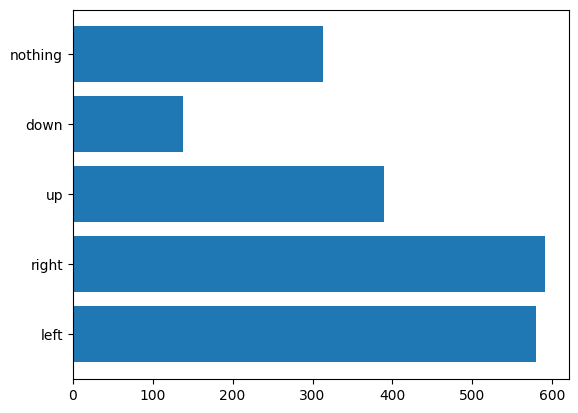

In [26]:
from matplotlib import pyplot as plt
# barh graph of each label type

plt.barh(list(one_hot_encoding.keys()), labels.sum(axis=0))

In [20]:
print(labels.sum(axis=0))

[374 384 250  93 201]
